# Effects of borrowers credit attributes on their APR
## by Vijay Elango

## Investigation Overview

> In this investigation, I wanted to look at the effects of Borrowers credit attributes on their APR. The main focus was on the custom calculated Prosper Score and Borrowers Credit Score.

## Dataset Overview

> The dataset contains loan data, Borrowers credit attributes and lender data at a loan listing level. There were a total of 113937 loan listings and a variety of attributes in 81 columns(variables). We restricted our data to after 2009 due to Prosper's change in business model/credit policy. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df1 = pd.read_csv("prosperLoanData.csv")

In [3]:
# It should also be noted Prosper changed their business model and credit policy.
# They started using Prosper rating instead of CreditGrade. We will clean data prior to 2009.

df1.dropna(subset = ['ProsperScore'],inplace = True)

In [4]:
# We will limit our focus to below variables instead of 81 that were provided

df1 = df1[['Term','LoanStatus','BorrowerAPR','LenderYield','ProsperScore','ProsperRating (Alpha)','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','OpenRevolvingMonthlyPayment','DebtToIncomeRatio','IncomeRange','IncomeVerifiable','StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationQuarter']]

In [5]:
# Rename column headers to remove space
df1.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha','ListingCategory (numeric)': 'ListingCategory_numeric'}, inplace=True)

## Distribution of Borrowers APR

> Distribution of Borrowers APR takes a range of values from 4.5% to 42.4%. Plotted on a linear scale the APR takes a multimodal shape with giant spike near the end due to high APRs provided to riskier borrowers. 

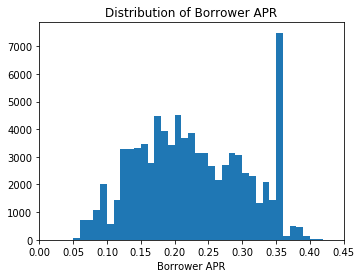

In [6]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1) 
binsize1 = .01
bins1 = np.arange(0, df1['BorrowerAPR'].max()+binsize1, binsize1)
plt.hist(data = df1, x = 'BorrowerAPR', bins = bins1)
plt.xlim([0,.45])
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR');

## Distribution of Prosper Score

> A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. The distribution of ProsperScore looks normally distributed. It suggests overall risk is nicely balanced out.

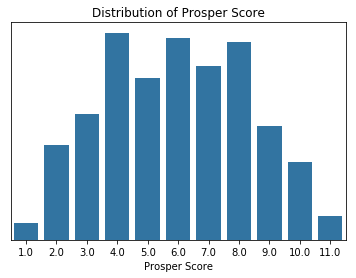

In [7]:
base_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'ProsperScore', color = base_color);
plt.title('Distribution of Prosper Score')
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('Prosper Score');

## Distribution of Credit Scores

> We can see the data in the distribution start from 600. 
> This is because of Prospers requirement for a borrower to request loan. 
<br> They need to have a FICO 8 credit score of, 
<br> 1) at least 640 for new borrowers
<br> 2) and a score of 600 for returning borrowers
<br> Since peer to peer lending is an unsecured personal loan, Prosper is choosing its borrowers carefully to limit loan defaults. The distribution is right skewed because the average credit score tends to be in the upper 690's and lower 700's. A blog post from Experian below,
<br> https://www.experian.com/blogs/ask-experian/what-is-the-average-credit-score-in-the-u-s/

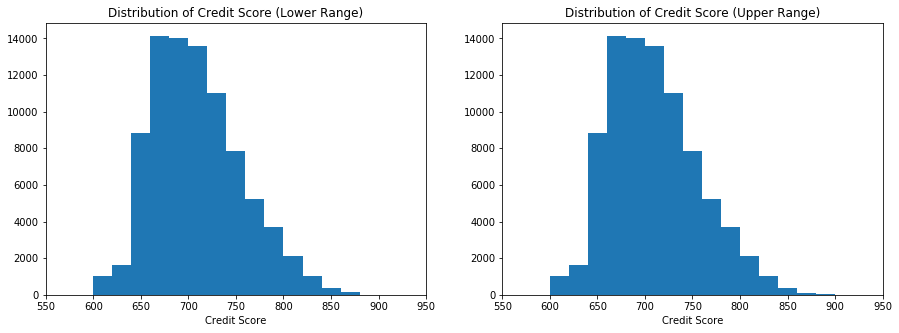

In [8]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1) 
binsize1 = 20
bins1 = np.arange(0, df1['CreditScoreRangeLower'].max()+binsize1, binsize1)
plt.hist(data = df1, x = 'CreditScoreRangeLower', bins = bins1)
plt.xlim([550,950])
plt.title('Distribution of Credit Score (Lower Range)')
plt.xlabel('Credit Score')

plt.subplot(1, 2, 2) 
binsize2 = 20
bins2 = np.arange(0, df1['CreditScoreRangeUpper'].max()+binsize2, binsize2)
plt.hist(data = df1, x = 'CreditScoreRangeUpper', bins = bins2)
plt.xlim([550,950])
plt.title('Distribution of Credit Score (Upper Range)')
plt.xlabel('Credit Score');

## Prosper Score vs. Borrowers APR

> Looking at the IQR from the boxplot below, it is very clear that as ProsperScore increases, the APR's decrease.
> There are long whiskers confirming outliers in the data.

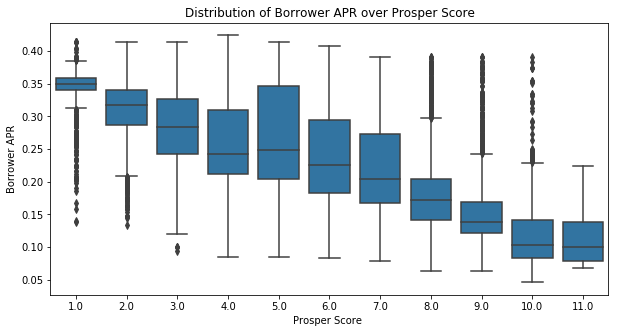

In [9]:
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]

sb.boxplot(data = df1, x = 'ProsperScore', y = 'BorrowerAPR', color = base_color);
plt.title('Distribution of Borrower APR over Prosper Score');
plt.ylabel('Borrower APR')
plt.xlabel('Prosper Score ');

## Credit Score vs. Borrowers APR

> We can see that Borrowers with large APR being on the lower end of credit range and APRs gradually decreasing as credit score increases.
> The regression plot on the side makes the correlation between these two variables evident.
> It can be clearly seen the credit score and APR are negatively correlated.

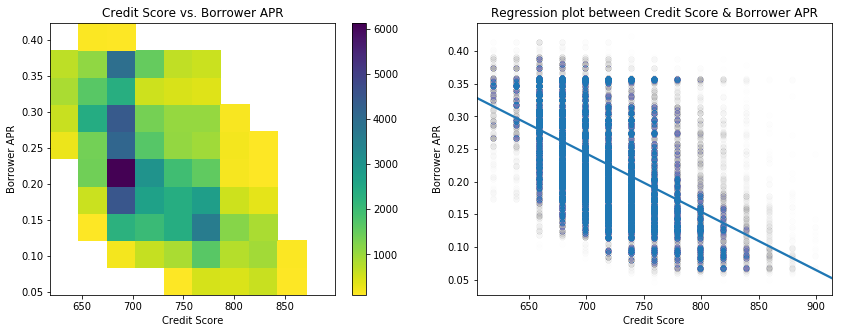

In [10]:
plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
plt.hist2d(data = df1, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR',
             cmap = 'viridis_r', cmin = 100);
plt.colorbar()
plt.title('Credit Score vs. Borrower APR')
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR');

plt.subplot(1, 2, 2)
sb.regplot(data = df1, y = 'BorrowerAPR', x = 'CreditScoreRangeUpper' , scatter_kws = {'alpha' : .0025});
plt.title('Regression plot between Credit Score & Borrower APR');
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR');

## Time series analysis of Prosper Score vs. Borrowers APR

> We can see that avg APR secured by borrowers of various prosper scores are having an downward trend.
> It can be clearly seen that borrowers of higher ProsperScore were always able to obtain lesser APRs.

In [11]:
var = ['Q3 2009','Q4 2009','Q1 2010','Q2 2010','Q3 2010','Q4 2010','Q1 2011','Q2 2011','Q3 2011','Q4 2011','Q1 2012','Q2 2012','Q3 2012','Q4 2012','Q1 2013','Q2 2013','Q3 2013','Q4 2013','Q1 2014']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
df1['LoanOriginationQuarter'] = df1['LoanOriginationQuarter'].astype(ordered_var) 

In [12]:
var = [11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
df1['ProsperScore'] = df1['ProsperScore'].astype(ordered_var)

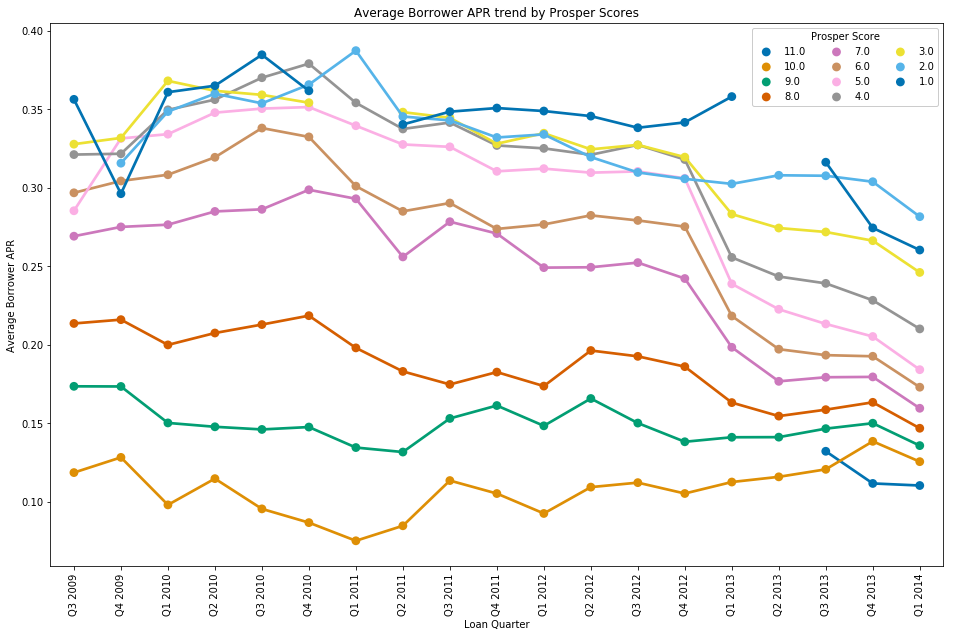

In [13]:
df_loan = df1.groupby(['LoanOriginationQuarter','ProsperScore'])['BorrowerAPR'].mean().reset_index()

plt.figure(figsize=[16, 10])
ax = sb.pointplot(data = df_loan, x = 'LoanOriginationQuarter', y = 'BorrowerAPR', hue = 'ProsperScore',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 1, ncol = 3,framealpha = 1, title = 'Prosper Score')
plt.title('Average Borrower APR trend by Prosper Scores')
plt.ylabel('Average Borrower APR');
plt.xlabel('Loan Quarter');
plt.xticks(rotation = 90);

## Time series analysis of Credit Rating vs. Borrowers APR

> I would like to check the effect of credit score on APR. 
> Since the CreditScores are provided as ranges in this dataset, I cant use it directly to look at the trend the way I want.
> I used upper limit as the borrowers credit score and built a bin of credit ratings to look at their trend.
<br> Bins are created using Experian range available in below URL
<br> https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/
>
> We can see that the borrowers with Fair credit rating had to borrow at a higher APR as compared to other credit ratings over the years.
> The APRs are consitently lower for borrowers with higher credit ratings. 
> It reiterates the negative correlation we saw in earlier bivariate plots.

In [14]:
df1['LoanYear'] = df1['LoanOriginationQuarter'].str.slice(start=3)

bin_edges = [300,580,670,740,800,850]
bin_names = ['Very Poor','Fair' , 'Good' , 'Very Good','Exceptional' ] 
df1['CreditRating'] = pd.cut(df1['CreditScoreRangeUpper'], bin_edges, labels=bin_names)

# Credit Rating as ordered categorical variable.
var = ['Very Poor','Fair' , 'Good' , 'Very Good','Exceptional']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var)
df1['CreditRating'] = df1['CreditRating'].astype(ordered_var)

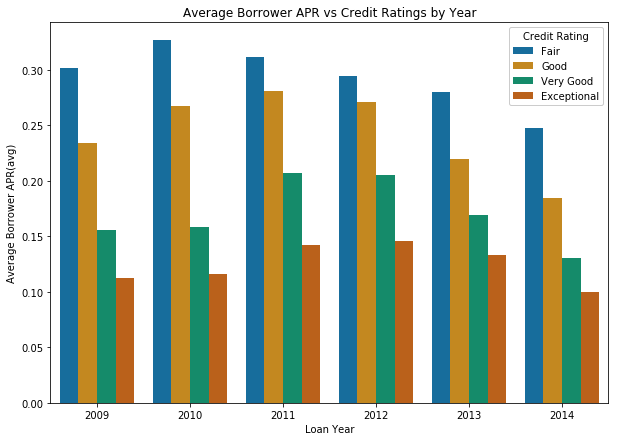

In [15]:
df1['CreditRating'] = df1['CreditRating'].cat.remove_unused_categories()
df_loan = df1.groupby(['LoanYear','CreditRating'])['BorrowerAPR'].mean().reset_index()

plt.figure(figsize=[10,7])
ax = sb.barplot(data = df_loan, x = 'LoanYear', y = 'BorrowerAPR', hue = 'CreditRating',palette=sb.color_palette('colorblind', n_colors=11));
ax.legend(loc = 1, ncol = 1,framealpha = 1, title = 'Credit Rating');
plt.title('Average Borrower APR vs Credit Ratings by Year')
plt.ylabel('Average Borrower APR(avg)');
plt.xlabel('Loan Year');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!